[[5, 7, 9, 10, 11, 13, 15, 16, 20, 21, 23, 25, 26, 28], [12], [2], [8], [18], [17], [0], [29], [27], [6], [4], [24], [3], [14], [22], [19], [1]]
The best front for Generation number  0  is
-51.349 -47.239 -8.302 -9.394 -5.283 -20.07 -19.481 -47.857 -27.73 0.61 -38.574 -39.084 -32.977 -20.643 

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [25], [26], [27], [28], [29]]
The best front for Generation number  1  is
1.569 -51.349 -47.239 -8.302 -9.394 -5.283 -20.07 -19.481 -47.857 -27.73 0.61 -38.574 -5.607 -39.084 -32.977 -6.455 -5.847 -20.643 -3.34 -2.721 -34.278 -8.51 -4.972 2.386 -20.185 

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
The best front for Generation number  2  is
-40.971 1.569 -51.349 -47.239 -8.302 -9.394 -5.283 -20.07 -19.481 -47.857 -27.73 0.61 -38.574 -5.607 -39.084 -32.977 -6.455 -5.847 -20.643 -3.34 -34.611 -2.721 -4.408 -18.289 -34.278 -12.573 -8.51 -23

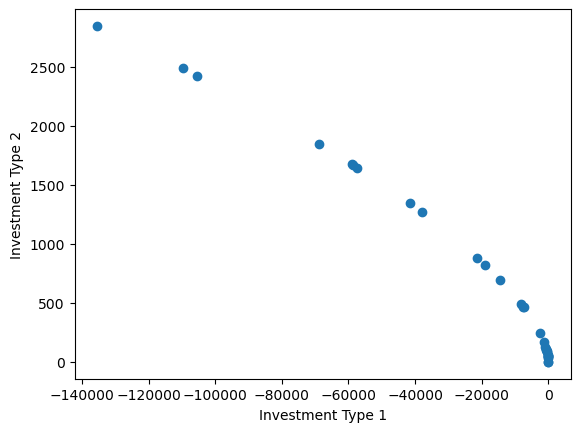

In [28]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
VarSize=1

#First function to optimize
def function1(x):
    value = -x**3
    return value

#Second function to optimize
def function2(x):
    value = -(x-2)**2
    return value

#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list


def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance




pop_size = 30
max_gen = 15


min_x=-55
max_x=55
solution=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
gen_no=0
while(gen_no<max_gen):
    function1_values = [function1(solution[i])for i in range(0,pop_size)]
    function2_values = [function2(solution[i])for i in range(0,pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
    print(non_dominated_sorted_solution)
    print("The best front for Generation number ",gen_no, " is")
    for valuez in non_dominated_sorted_solution[0]:
        print(round(solution[valuez],3),end=" ")
    print("\n")
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]
    #Generating offsprings
    while (len(solution2)!=2*pop_size):
        for i in range(pop_size):
            r = np.zeros(3, dtype=int)
            r[0] = i
            while r[1] == r[0]:
                r[1] = np.random.randint(0, pop_size)
            while r[2] == r[0] or r[2] == r[1]:
                r[2] = np.random.randint(0, pop_size)

            r1, r2, r3 = solution[r[0]], solution[r[1]], solution[r[2]]
            D = np.array([r[k] / pop_size for k in range(3)])
            V = np.random.rand(3) * (1 - D)

            y = np.linalg.norm(np.array(D[2]) - np.array(D[1]))
            x = np.linalg.norm(np.array(D[2]) - np.array(D[0]))
            x1 = V[2] * x / (V[0] - V[2])
            y1 = V[1] * x / (V[0] - V[2])

            if V[0] > V[2]:
                if (y - y1) > x1:
                    Vco = V[0] / (V[0] - V[2])
                    X_newpos = np.array(r1) + Vco * np.random.rand(1) * (np.array(r1) - np.array(r3))
                else:
                    X_newpos = np.array(r1) + (np.random.rand(1)) * (np.array(r1) - np.array(r2))
            else:
                X_newpos = np.array(r1) + np.random.rand(1) * (np.array(r3) - np.array(r1))

        X_newpos = np.maximum(X_newpos, min_x)
        X_newpos = np.minimum(X_newpos, max_x)
        X_new =X_newpos
        solution2.append(X_new[0])
    
    function1_values2 = [function1(solution2[i])for i in range(0,2*pop_size)]
    function2_values2 = [function2(solution2[i])for i in range(0,2*pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
    crowding_distance_values2=[]
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
    new_solution= []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):
            break
    solution = [solution2[i] for i in new_solution]
    gen_no = gen_no + 1


function1 = [i * -1 for i in function1_values]
function2 = [j * -1 for j in function2_values]
plt.xlabel('Investment Type 1', fontsize=10)
plt.ylabel('Investment Type 2', fontsize=10)
plt.scatter(function1, function2)
plt.show()